# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [15]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data.Gender == 'Male']
female_df =  data.loc[data.Gender == 'Female']

print('Male Height mean: ', male_df.Height.mean())
# Male Height mean: 69.02634590621737
print('Male Height sd: ', male_df.Height.std())
# Male Height sd: 2.8633622286606517
print('Male Weight mean: ', male_df.Weight.mean())
# Male Weight mean: 187.0206206581929
print('Male Height sd: ', male_df.Weight.std())
# Male Weight sd: 19.781154516763813
print('Female Height mean: ', female_df.Height.mean())
# Female Height mean: 63.708773603424916
print('Female Height sd: ', female_df.Height.std())
# Female Height sd: 2.696284015765056
print('Female Weight mean: ', female_df.Weight.mean())
# Female Weight mean: 135.8600930074687
print('Female Weight sd: ', female_df.Weight.std())
# Female Weight sd: 19.022467805319007

Male Height mean:  69.02634590621737
Male Height sd:  2.8633622286606517
Male Weight mean:  187.0206206581929
Male Height sd:  19.781154516763813
Female Height mean:  63.708773603424916
Female Height sd:  2.696284015765056
Female Weight mean:  135.8600930074687
Female Weight sd:  19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

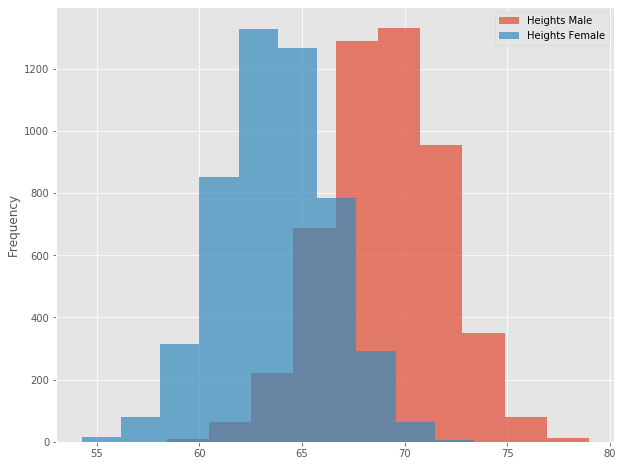

In [23]:
# Your code here
fig = plt.figure(figsize=(10,8))
male_df.Height.plot.hist(bins=10, alpha=0.7, label='Heights Male')
female_df.Height.plot.hist(bins=10, alpha=0.7, label='Heights Female')
plt.legend();

In [24]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

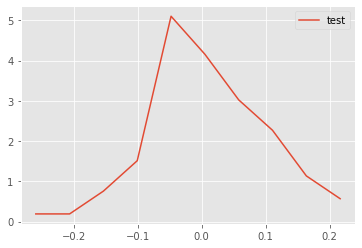

In [27]:
def density(x):
    
    # found answer... this makes sense, but was entirely unclear what was being
    # asked for...
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

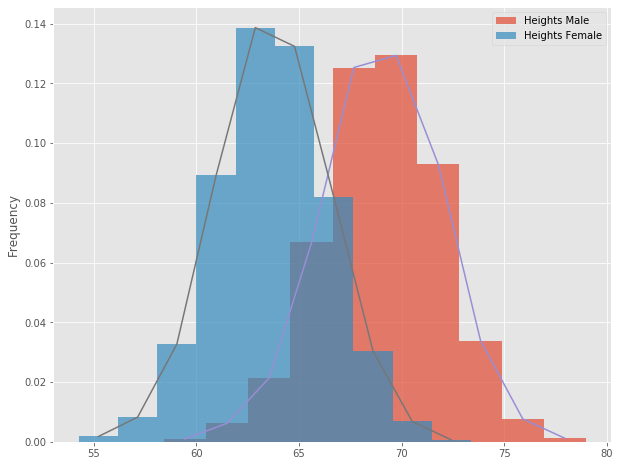

In [32]:
# Your code here
fig = plt.figure(figsize=(10,8))
male_df.Height.plot.hist(bins=10, alpha=0.7, label='Heights Male', density=True)
female_df.Height.plot.hist(bins=10, alpha=0.7, label='Heights Female', density=True)
x_mal,y_mal = density(male_df.Height)
x_fem, y_fem = density(female_df.Height)
plt.plot(x_mal,y_mal)
plt.plot(x_fem, y_fem)
plt.legend();


## Repeat the above exercise for male and female weights

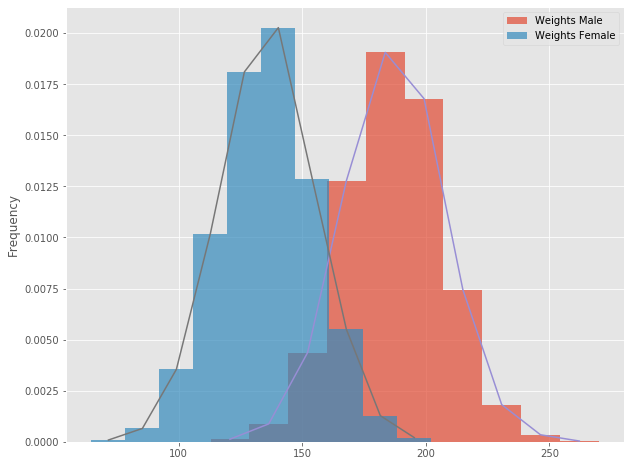

In [33]:
# Your code here 
fig = plt.figure(figsize=(10,8))
male_df.Weight.plot.hist(bins=10, alpha=0.7, label='Weights Male', density=True)
female_df.Weight.plot.hist(bins=10, alpha=0.7, label='Weights Female', density=True)
x_mal,y_mal = density(male_df.Weight)
x_fem, y_fem = density(female_df.Weight)
plt.plot(x_mal,y_mal)
plt.plot(x_fem, y_fem)
plt.legend();

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

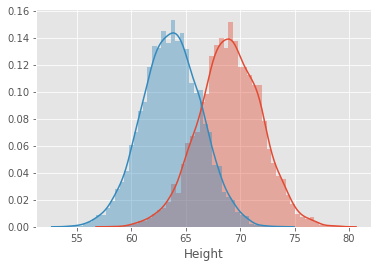

In [34]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.show()

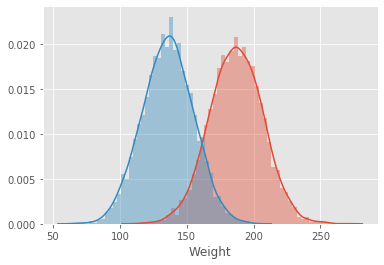

In [36]:
# Code for weights here
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)


In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

# Lol, what a silly lab, there are so many more interesting and useful things that could
# be done with pdfs instead..

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.